# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1737768375932.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,01/23/2025,6118.71,6076.32,6118.73,6074.67
1,01/22/2025,6086.37,6081.39,6100.81,6076.13
2,01/21/2025,6049.24,6014.12,6051.51,6006.88
3,01/17/2025,5996.66,5995.40,6014.96,5978.44
4,01/16/2025,5937.34,5963.61,5964.69,5930.72
...,...,...,...,...,...
2517,01/30/2015,1994.99,2019.35,2023.32,1993.38
2518,01/29/2015,2021.25,2002.45,2024.64,1989.18
2519,01/28/2015,2002.16,2032.34,2042.49,2001.49
2520,01/27/2015,2029.55,2047.86,2047.86,2019.91


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2522.000000,2522.000000,2522.000000,2522.000000
mean,3374.803148,3368.593719,3386.431495,3349.379520
std,1096.911916,1108.889337,1114.430906,1103.181861
min,1829.080000,0.000000,0.000000,0.000000
25%,2437.992500,2436.417500,2448.962500,2428.140000
50%,3014.035000,3015.935000,3027.685000,3000.125000
75%,4224.632500,4227.227500,4255.777500,4200.330000
max,6118.710000,6089.030000,6118.730000,6079.980000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,3378.455535,3377.969527,3395.856950,3358.701849
std,1096.242450,1096.072797,1101.541704,1090.447382
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2439.710000,2441.710000,2450.405000,2430.925000
50%,3022.550000,3018.590000,3046.900000,3001.150000
75%,4226.010000,4228.425000,4256.220000,4201.115000
max,6118.710000,6089.030000,6118.730000,6079.980000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2521
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Open        2515 non-null   float64
 3   High        2515 non-null   float64
 4   Low         2515 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2515, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

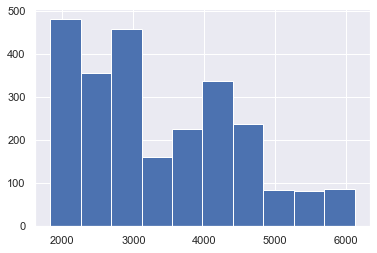

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

6118.71

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3378.455534791252

In [10]:
close_sd = df['Close/Last'].std()
close_sd

1096.2424504031287

In [11]:
sigma1 = close_mean + close_sd
sigma1

4474.697985194381

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5570.940435597509

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

6119.061660799074

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2521
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2015-01-26 to 2025-01-23')

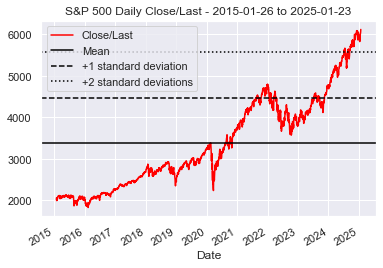

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2015-01-26 to 2025-01-23')

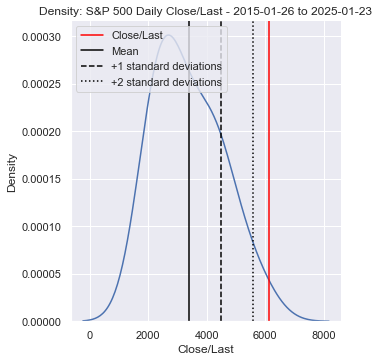

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.499679212569314

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results